# Full Pipeline Test
This section tests the Full Pipeline - which runs on a single participant's data.

The process is as follows:
1. Use helper function, [generate_random_test_points](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.tools.generate_random_test_points), to generate actual and test coordinates.
2. Create a [ParticipantData](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.data_structures.ParticipantData) object populated with a list containing a single [TrialData](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.data_structures.TrialData) object (i.e. one participant with one trial).
3. Create an [AnalysisConfiguration](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.data_structures.AnalysisConfiguration) object which contains the configuration information for how the analysis should be run.
4. Call the [full_pipeline](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.full_pipeline.full_pipeline) function with the data and configuration and ask it to visualize the result.

This process could then be run in a loop if desired over any data of interest, however, as will be shown in the next section, the [batch_pipeline](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.batch_pipeline.batch_pipeline) function provides a variety of functionality to make this largely unnecessary.

Note: If you've never used Jupyter Notebooks before, please see the [Jupyter/IPython Notebook Quick Start Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/).

In [3]:
# Import the library functions we're using
from cogrecon.core.full_pipeline import full_pipeline
from cogrecon.core.data_structures import TrialData, ParticipantData, AnalysisConfiguration
from cogrecon.core.tools import generate_random_test_points
# Set up visualization via matplotlib
%matplotlib inline

Original Misplacement: 0.535523803242
Original Swap: 0.2
Original Edge Resizing: 0.235812629393
Original Edge Distortion: 0.9
Axis Swap Pairs: [[1, 4], [2, 3]]
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 0.835654894135
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 0.267779977935
Raw Deanonymized Misplacement: 0.119992776159
Post-Deanonymized Misplacement: 0.119992776159
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.794507235335
Scaling: 0.97800051366
Translation Magnitude: 0.0153917961679
TranslationX: -0.0151802941224
TranslationY: -0.00254284479129
Geometric Distance Threshold: 0.267779977935
Post-Transform Misplacement: 0.117945400107
Number of Components: 3
Accurate Single-Item Placements: 1
Inaccurate Single-Item Placements: 0
True Swaps: 1
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0

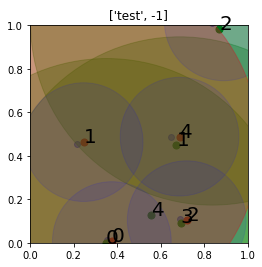

In [7]:
# Test with random points
actual_coordinates, data_coordinates = generate_random_test_points()
data = ParticipantData([TrialData(actual_coordinates, data_coordinates)])
config = AnalysisConfiguration(debug_labels=['test', -1])
result = full_pipeline(data, config, visualize=True, visualization_extent=[[0., 1.], [0., 1.]])

# Batch Pipeline Test
This section tests the Batch Pipeline, which runs on a folder full of data files, automatically finding the appropriate files. The process is as follows:
1. Produce a UI window for selection of a directory.
2. Once a valid directory has been selected, run the [batch_pipeline](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.batch_pipeline.batch_pipeline) command on the directory.

Note that the [batch_pipeline](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.batch_pipeline.batch_pipeline) function has a variety of options to make locating and processing large groups of files easier. Some of the more critical inputs are:
* **trial_by_trial_accuracy** - if *True*, the accuracy windows are calculated on individual trials; otherwise, the accuracy windows are computed using the entire participant's data at once (this is generally preferred and is default)
* **collapse_trials** - if *True*, one row per participant will be produced in the output; otherwise, each trial will get its own row (note that this does not impact whether or not the accuracy is being computed on a per-trial or per-participant basis)
* **removal_dim_indicies** - this parameter takes a list of dimension indicies which will be excluded from the analysis (i.e. if the data is 3D, and only the first and third dimensions should be analyzed, the input could be *removal_dim_indicies=[1]*)
* **actual_coordinate_prefixes** - if *True*, it is assumed that there will be a *\*actual_coordinates.txt* file for every *\*position_data_coordinates.txt* file; otherwise, only one *actual_coordinates.txt* file is expected
* **\_data_coodinates_file_suffix**, **\_actual_coordinates_file_suffix** - these provide the search string for finding files of each type (i.e. *position_data_coordinates.txt* and *actual_coordinates.txt*)

Note: The [batch_pipeline](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.batch_pipeline.batch_pipeline) function can produce a significant number of logged outputs (mostly warnings about transformation functions). These outputs are generated via the [logging](https://docs.python.org/2/howto/logging.html#) library, and they can be supressed by uncommenting the following lines from the import cell:

    import logging
    logging.disable(logging.WARNING)
    
Note 2: Sometimes, the easygui.diropenbox prompt appears behind other active windows. Use ALT+TAB to easily find the window.

In [24]:
from cogrecon.core.batch_pipeline import batch_pipeline
from cogrecon.core.data_structures import TrialData, ParticipantData, AnalysisConfiguration
import os, datetime, easygui
# import logging
# logging.disable(logging.WARNING)

In [25]:
selected_directory = easygui.diropenbox()  # Get a directory from the user

# Make the output filename just the current datatime
output_filename = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.csv")

if selected_directory is not None:  # If the user doesn't cancel the selection window
    if os.path.exists(selected_directory):  # If the directory exists
        batch_pipeline(str(selected_directory), output_filename)
    elif selected_directory is not '':
        logging.error('Directory not found.')